In [2]:
from sklearn import datasets
iris = datasets.load_iris()
data=iris.data
data.shape

(150, 4)

In [3]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [5]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],cmap = plt.cm.gray_r)

In [6]:
data = digits.images.reshape((digits.images.shape[0],-1))
data.shape

(1797, 64)

In [8]:
from sklearn import datasets
import numpy as np
iris= datasets.load_iris()
iris_x = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [19]:
np.random.seed(0)
indices = np.random.permutation(len(iris_x))
iris_x_train = iris_x[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_x_test = iris_x[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [20]:
np.random.permutation(5)

array([1, 2, 4, 3, 0])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_x_train,iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
knn.predict(iris_x_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [23]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [24]:
diabetes = datasets.load_diabetes()
diabetes_x_train = diabetes.data[:-20]
diabetes_x_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_x_train,diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print(regr.coef_)#回归系数

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [27]:
regr.predict(diabetes_x_test)

array([ 197.61846908,  155.43979328,  172.88665147,  111.53537279,
        164.80054784,  131.06954875,  259.12237761,  100.47935157,
        117.0601052 ,  124.30503555,  218.36632793,   61.19831284,
        132.25046751,  120.3332925 ,   52.54458691,  194.03798088,
        102.57139702,  123.56604987,  211.0346317 ,   52.60335674])

In [28]:
diabetes_y_test

array([ 233.,   91.,  111.,  152.,  120.,   67.,  310.,   94.,  183.,
         66.,  173.,   72.,   49.,   64.,   48.,  178.,  104.,  132.,
        220.,   57.])

In [29]:
np.mean((regr.predict(diabetes_x_test)-diabetes_y_test)**2)

2004.5676026898211

In [31]:
regr.score(diabetes_x_test, diabetes_y_test) 

0.58507530226905735

In [36]:
x= np.c_[0.5,1].T
y= [0.5,1]

In [37]:
x

array([[ 0.5],
       [ 1. ]])

In [38]:
np.c_[0.5,1]

array([[ 0.5,  1. ]])

In [39]:
test= np.c_[0,2].T

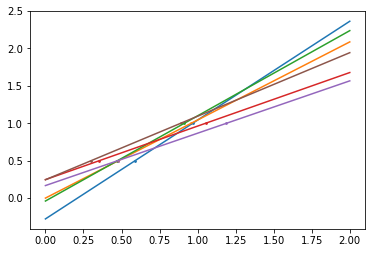

In [44]:
regr= linear_model.LinearRegression()
import matplotlib.pyplot as plt
plt.figure()
np.random.seed()
for _ in range(6):
    this_x = 0.1 *np.random.normal(size=(2,1))+x
    regr.fit (this_x,y)
    plt.plot(test,regr.predict(test))
    plt.scatter(this_x,y,s=3)
plt.show()

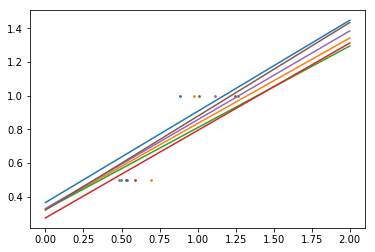

In [45]:
regr= linear_model.Ridge(alpha=0.1)
import matplotlib.pyplot as plt
plt.figure()
np.random.seed()
for _ in range(6):
    this_x = 0.1 *np.random.normal(size=(2,1))+x
    regr.fit (this_x,y)
    plt.plot(test,regr.predict(test))
    plt.scatter(this_x,y,s=3)
plt.show()

Ridge :岭回归，损失函数加了一个L2范数，使得回归系数都趋向于零

In [46]:
alphas= np.logspace(-4,-1,6)#等比数列
alphas

array([ 0.0001    ,  0.00039811,  0.00158489,  0.00630957,  0.02511886,
        0.1       ])

In [49]:
from __future__ import print_function
print([regr.set_params(alpha=alpha).fit(diabetes_x_train,diabetes_y_train).score(diabetes_x_test,diabetes_y_test) for alpha in alphas])

[0.58511106838835303, 0.58520730154446765, 0.5854677540698493, 0.58555120365039159, 0.58307170855541623, 0.57058999437280122]


In [50]:
regr = linear_model.Lasso()
scores =[regr.set_params(alpha=alpha).fit(diabetes_x_train,diabetes_y_train).score(diabetes_x_test,diabetes_y_test) for alpha in alphas]

In [51]:
scores

[0.58511910691622271,
 0.58524713649060522,
 0.58571895391793527,
 0.58730094854527426,
 0.58876224183092618,
 0.58284500296816799]

In [53]:
best_alpha = alphas[scores.index(max(scores))]
best_alpha

0.025118864315095794

In [54]:
regr.alpha = best_alpha
regr.fit(diabetes_x_train,diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


In [56]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_x_train,iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [57]:
from sklearn import svm
svc=svm.SVC(kernel ='linear')
svc.fit(iris_x_train,iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.938889


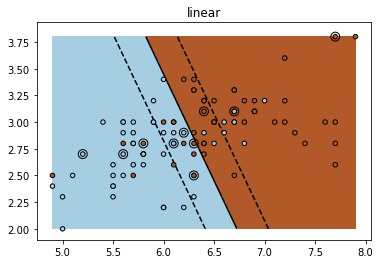

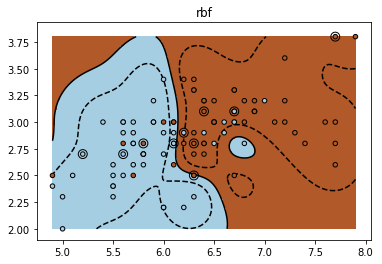

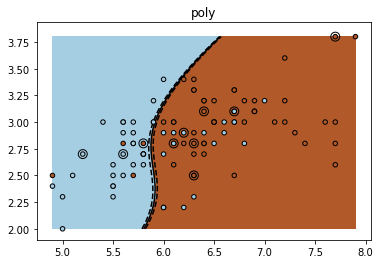

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
               linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

**Model selection: choosing estimators and their parameters**

In [7]:
from sklearn import datasets,svm
digits = datasets.load_digits()
x_digits= digits.data
y_digits = digits.target
svc = svm.SVC(C=1,kernel = 'linear')
svc.fit(x_digits[:-100],y_digits[:-100]).score(x_digits[-100:],y_digits[-100:])

0.97999999999999998

In [8]:
import numpy as np
x_folds = np.array_split(x_digits,3)
y_folds = np.array_split(y_digits,3)
scores= list()
for k in range(3):
    x_train= list(x_folds)
    x_test = x_train.pop(k)
    x_train = np.concatenate(x_train)
    y_train= list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(x_train,y_train).score(x_test,y_test))
print(scores)

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


In [9]:
x_folds

[array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.],
        ..., 
        [  0.,   0.,   5., ...,  16.,  11.,   2.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  12.,   0.,   0.]]),
 array([[  0.,   0.,   1., ...,  16.,  16.,   8.],
        [  0.,   0.,  10., ...,  16.,  16.,   9.],
        [  0.,   0.,   6., ...,  16.,  15.,   3.],
        ..., 
        [  0.,   1.,  13., ...,   0.,   0.,   0.],
        [  0.,   1.,   7., ...,  12.,   2.,   0.],
        [  0.,   0.,  13., ...,   0.,   0.,   0.]]),
 array([[  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   7., ...,   8.,   0.,   0.],
        [  0.,   0.,  12., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   2., ...,  12.,   0.,   0.],
        [  0.,   0.,  10., ...,  12.,   1.,   0.]])]

In [10]:
x_train= list(x_folds)
x_train

[array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.],
        ..., 
        [  0.,   0.,   5., ...,  16.,  11.,   2.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  12.,   0.,   0.]]),
 array([[  0.,   0.,   1., ...,  16.,  16.,   8.],
        [  0.,   0.,  10., ...,  16.,  16.,   9.],
        [  0.,   0.,   6., ...,  16.,  15.,   3.],
        ..., 
        [  0.,   1.,  13., ...,   0.,   0.,   0.],
        [  0.,   1.,   7., ...,  12.,   2.,   0.],
        [  0.,   0.,  13., ...,   0.,   0.,   0.]]),
 array([[  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   7., ...,   8.,   0.,   0.],
        [  0.,   0.,  12., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   2., ...,  12.,   0.,   0.],
        [  0.,   0.,  10., ...,  12.,   1.,   0.]])]

In [12]:
from sklearn.model_selection import KFold,cross_val_score
x=['a','a','b','c','c','c']
k_fold = KFold(n_splits =3)
for train_indices,test_indices in k_fold.split(x):
    print('Trian: %s | test: %s' % (train_indices,test_indices))

Trian: [2 3 4 5] | test: [0 1]
Trian: [0 1 4 5] | test: [2 3]
Trian: [0 1 2 3] | test: [4 5]


In [15]:
print(list(k_fold.split(x)))

[(array([2, 3, 4, 5]), array([0, 1])), (array([0, 1, 4, 5]), array([2, 3])), (array([0, 1, 2, 3]), array([4, 5]))]


In [16]:
[svc.fit(x_digits[train],y_digits[train]).score(x_digits[test],y_digits[test]) for train,test in k_fold.split(x_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [20]:
cross_val_score(svc,x_digits,y_digits,cv = k_fold,scoring = 'precision_macro')

array([ 0.93969761,  0.95911415,  0.94041254])

In [21]:
cross_val_score(svc,x_digits,y_digits,cv = 4,scoring = 'precision_macro')

array([ 0.95694485,  0.94456105,  0.96871105,  0.9289917 ])

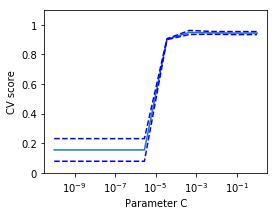

In [26]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets,svm
digits= datasets.load_digits()
x= digits.data
y= digits.target
svc= svm.SVC(kernel ='linear')
C_s = np.logspace(-10,0,10)
scores=list()
scores_std = list()
for C in C_s:
    svc.C=C
    this_scores = cross_val_score(svc,x,y,n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
import matplotlib.pyplot as plt
plt.figure(1,figsize =(4,3))
plt.clf()
plt.semilogx(C_s,scores)#X轴取对数坐标
plt.semilogx(C_s,np.array(scores) + np.array(scores_std),'b--')
plt.semilogx(C_s,np.array(scores) - np.array(scores_std),'b--')
locs,labels = plt.yticks()#定义坐标轴刻度
plt.yticks(locs,list(map(lambda x: '%g' % x,locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0,1.1)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV,cross_val_score
Cs = np.logspace(-6,-1,10)
clf = GridSearchCV(estimator = svc,param_grid = dict(C=Cs),n_jobs=-1)
clf.fit(x_digits[:-100],y_digits[:-100])


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
clf.best_score_

0.95109015910430172

In [30]:
clf.best_estimator_.C

0.0021544346900318843

In [31]:
clf.score(x_digits[-100:],y_digits[-100:])

0.97999999999999998

In [32]:
cross_val_score(clf,x_digits,y_digits)

array([ 0.93853821,  0.96327212,  0.94463087])

In [36]:
from sklearn import linear_model,datasets
lasso = linear_model.LassoCV()
diabetes= datasets.load_diabetes()
x_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(x_diabetes,y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [37]:
lasso.alpha_

0.012291895087486161

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.10405, score: 0.53573
[fold 1] alpha: 0.05968, score: 0.16278
[fold 2] alpha: 0.10405, score: 0.44437

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


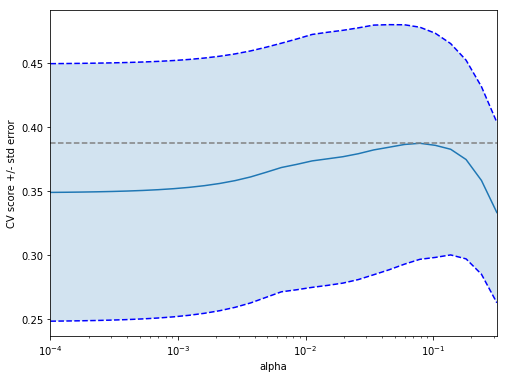

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')#画水平线
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

**Unsupervised learning: seeking representations of the data**

In [43]:
from sklearn import cluster,datasets
iris= datasets.load_iris()
x_iris = iris.data
y_iris = iris.target
k_means = cluster.KMeans(n_clusters =3)
k_means.fit(x_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
print(k_means.labels_[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


In [45]:
print(y_iris[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


**Principal component analysis: PCA**

In [46]:
x1= np.random.normal(size=100)
x2= np.random.normal(size=100)
x3=x1+x2
X=np.c_[x1,x2,x3]
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
print(pca.explained_variance_)

[  2.81502583e+00   1.10116453e+00   1.93825983e-32]


In [48]:
X

array([[ 0.79168086,  0.23551733,  1.02719819],
       [-0.14966864,  0.65176503,  0.50209639],
       [-0.02428179,  0.73998621,  0.71570442],
       [-1.80401548,  0.76589063, -1.03812484],
       [-0.94554644, -0.39089923, -1.33644566],
       [ 3.18554611,  0.39278317,  3.57832929],
       [-1.28656579, -1.98723771, -3.2738035 ],
       [ 1.49335889, -1.72445141, -0.23109253],
       [ 0.25110059,  0.59609809,  0.84719868],
       [ 2.00663737,  0.90583377,  2.91247114],
       [ 0.4625503 ,  0.04926062,  0.51181092],
       [ 1.44932345,  1.33427535,  2.7835988 ],
       [ 0.54556646, -1.43462903, -0.88906257],
       [-1.63410676, -1.60258626, -3.23669302],
       [ 0.80366308,  0.9788938 ,  1.78255688],
       [-0.64669252,  0.57013192, -0.07656059],
       [-0.20820688, -1.35803283, -1.56623972],
       [ 0.81768778, -0.66491622,  0.15277156],
       [ 0.00374188,  0.29864428,  0.30238616],
       [-1.58935934,  0.53166441, -1.05769493],
       [-1.55567281,  0.65104519, -0.904

In [49]:
x1

array([ 0.79168086, -0.14966864, -0.02428179, -1.80401548, -0.94554644,
        3.18554611, -1.28656579,  1.49335889,  0.25110059,  2.00663737,
        0.4625503 ,  1.44932345,  0.54556646, -1.63410676,  0.80366308,
       -0.64669252, -0.20820688,  0.81768778,  0.00374188, -1.58935934,
       -1.55567281,  1.25714027,  0.66400989,  0.13082975,  1.3863367 ,
       -1.23457851, -1.68475708,  0.72076832, -0.49617928,  1.05249327,
        0.2254355 , -1.08269339, -0.09697123,  0.25135046, -1.53041245,
        0.40342275,  0.58490609,  0.37957751, -0.16881067, -0.34969838,
        0.15340656, -0.14413203, -0.7436841 ,  0.96983763,  0.07093366,
       -1.10578689,  1.4950867 , -0.77200276, -1.20293255, -1.30761666,
        0.8505663 ,  0.50887609, -0.19561872, -0.16834255, -0.46349414,
       -0.43584071,  0.48813241,  0.30103269,  0.66456024, -1.61921567,
       -0.4839372 , -0.91423081, -0.4467889 , -1.54821926, -0.55932728,
       -1.91516755,  0.1049108 ,  0.46029783, -1.10421442,  1.35

In [52]:
pca.n_components =2
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

**Independent Component Analysis: ICA**

In [62]:
import numpy as np
from scipy import signal
time = np.linspace(0,10,2000)
s1= np.sin(2*time)
s2=np.sign(np.sin(3*time))
s3=signal.sawtooth(2*np.pi*time)
S= np.c_[s1,s2,s3]
S=S+0.2*np.random.normal(size = S.shape)
S=S/S.std(axis=0)
A= np.array([[1,1,1],[0.5,2,1],[1.5,1,2]])
X= np.dot(S,A.T)
ica= decomposition.FastICA()
S_ = ica.fit_transform(X)
A_ = ica.mixing_.T
np.allclose(X,np.dot(S_,A_)+ica.mean_)#检测两个矩阵是否相同，ica.mean_什么意思

True

**Putting it all together**

**Pipelining**

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


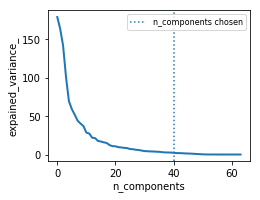

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,decomposition,datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe= Pipeline(steps =[('pca',pca),('logistic',logistic)])
digits= datasets.load_digits()
x_digits = digits.data
y_digits = digits.target
pca.fit(x_digits)
plt.figure(1,figsize =(4,3))
plt.clf()
plt.axes([0.2,0.2,0.7,0.7])
plt.plot(pca.explained_variance_,linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('expained_variance_')
n_components=[20,40,64]
Cs= np.logspace(-4,4,3)
estimator= GridSearchCV(pipe,dict(pca__n_components = n_components,logistic__C=Cs))
estimator.fit(x_digits,y_digits)
print(estimator.best_estimator_)
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,linestyle = ':',label = 'n_components chosen')
plt.legend(prop = dict(size =8))
plt.show()

**Face recognition with eigenfaces**

In [14]:
from time import time
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print(X.shape)
print(y.shape)
print(target_names.shape)

(1288, 1850)
(1288,)
(7,)


In [10]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

n_components = 150
print("Extracting the top %d eigenfaces from %d faces"% (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))
eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Extracting the top 150 eigenfaces from 966 faces
done in 0.801s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.015s
done in 21.215s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
done in 0.043s
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.77      0.61        13
     Colin Powell       0.72      0.82      0.77        60
  Donald Rumsfeld       0.70      0.70      0.70        27
    George W Bush       0.90      0.86      0.88       146
Gerhard Schroeder       0.81      0.84      0.82        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.90      0.72      0.80        36

      avg / total       0.82      0.81      0.81       322

[[ 10   0   3   0   0   

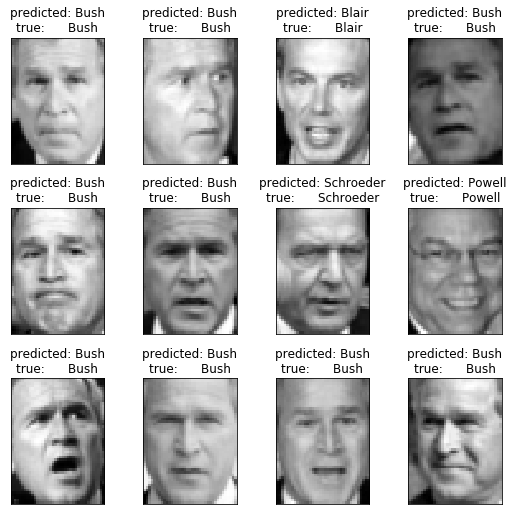

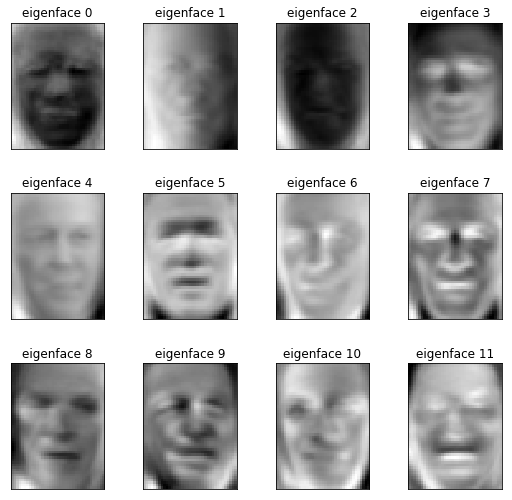

In [16]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

In [17]:
print(target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [19]:
for i in range(target_names.shape[0]):
    print(target_names[i].rsplit(' ', 1))

['Ariel', 'Sharon']
['Colin', 'Powell']
['Donald', 'Rumsfeld']
['George W', 'Bush']
['Gerhard', 'Schroeder']
['Hugo', 'Chavez']
['Tony', 'Blair']
